**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Corto:** 01

**Datos de la entrega:** Domingo 22 de agosto 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Eduardo Madrigal
- Gabriel Vargas

___

# Parte 1  -  Estudio de SVD 
___

## 1.1 Explicación de Singular Value Descomposition (SVD)

- Documento base:  https://nbviewer.jupyter.org/github/buruzaemon/svd/blob/master/01_SVD_visualizing_data.ipynb

Singular value decomposition factoriza una matriz $X \in \mathbb{R}^{m \times n}$  en:

* Matriz $U \in \mathbb{R}^{m \times m}$ son los vectores singular-izquierdos de $X$, donde las columnas son el conjunto de auto-vectores ortonormales de  $X \, X^{T}$.
* Matriz diagonal $\Sigma$ con entradas $\sigma \in \mathbb{R}$ que son los valores singulares  no-negativos de $X$.
* Matriz $V \in \mathbb{R}^{n \times n}$ son los vectores singular-derechos de $X$, donde las columnas son el conjunto de auto-vectores ortonormales de  $X^{T} \, X$.

tal que, 

\begin{align}
  X &= U \, \Sigma \, V^{T}
\end{align}

Las dimensiones de cada una de las matrices que factorizan $X \in \mathbb{R}^{m \times n}$ son:

![](https://drive.google.com/uc?id=1sVuy8_b_P9hZJF9zsrpB3j6d0EithUtR)


Con respecto a la relación con los auto-valores y auto-vectores: 

* $U$ corresponde a los auto-vectores de $X \, X^{T}$
* $V$ corresponde a los auto-vectores de $X^{T} \, X$
* $\Sigma$ corresponde a los auto-valores de $X \, X^{T}$ o $X^{T} \, X$, que son los mismos.


## 1.2 Ejemplo de aplicación de SVD

[Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

Los datos son multivariados, con 150 mediciones de 4 atributos (length and width cm de ambos:  sepal and petal) en tres distintas especies de Iris. De las 150 mediciones, hay 50 mediciones para _Iris setosa_, _Iris versicolor_, e _Iris virginica_.

[Scikit Learn's `datasets`](http://scikit-learn.org/stable/datasets/) incluye el conjunto de datos Iris.

![](https://drive.google.com/uc?id=125KRc9v-vQ5dVfO2IR7jkqyRChoDtCHI)

Fuente: https://www.researchgate.net/publication/265877256_How_plants_grow_and_move/figures?lo=1


In [62]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import sklearn.datasets
import sklearn.preprocessing 

In [63]:
iris = sklearn.datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)

#normalizing data
X_zscaled = (X - X.mean()) / X.std(ddof=1) #standard deviation. ddof = delta degrees of freedom

#guarda los nombres del tipo de flor para cada fila
Y = pd.DataFrame(iris.target, columns=['target'])
Y['species'] = Y.apply(lambda r: iris.target_names[r])

print("Dimensiones de la matriz: (filas,columnas)", X.shape)
print(X.head(5)) # imprime las primeras 5 filas del dataframe de iris
print(X_zscaled )

Dimensiones de la matriz: (filas,columnas) (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.897674          1.015602          -1.335752         -1.311052
1            -1.139200         -0.131539          -1.335752         -1.311052
2            -1.380727          0.327318          -1.392399         -1.311052
3            -1.501490          0.097889          -1.279104         -1.311052
4            -1.018437          1.245030          -1.335752         -1.311052
..                 ...  

In [65]:
# Realiza el SVD
U_iris, S_iris, Vt_iris = np.linalg.svd(X_zscaled)

#### $U$: vectores singular-izquierdos de $X$

Las filas de $U$ corresponden a las filas de la matriz original de datos $X$, mientras que las columnas son el conjunto de auto-vectores ordenados, ortonormales de  $X \, X^{T}$.

In [66]:
print('La matriz U tiene {} filas, {} columnas\n'.format(*U_iris.shape))

print('{}'.format(pd.DataFrame(U_iris).head(5)))

La matriz U tiene 150 filas, 150 columnas

        0         1         2         3         4         5         6    \
0 -0.108240 -0.040996  0.027219  0.013711 -0.093983 -0.067347 -0.132536   
1 -0.099458  0.057573  0.050003  0.058436  0.077725  0.142448  0.034067   
2 -0.112996  0.029200 -0.009421  0.016098 -0.030840 -0.037345  0.027905   
3 -0.109897  0.051019 -0.019457 -0.037417 -0.032518 -0.001968 -0.011684   
4 -0.114220 -0.055242 -0.003354 -0.020379  0.984502 -0.018293 -0.013244   

        7         8         9    ...       140       141       142       143  \
0 -0.086292 -0.132836 -0.082586  ...  0.059302  0.075102 -0.003320  0.076308   
1  0.038986 -0.066637 -0.020602  ...  0.026756  0.018141 -0.057745  0.055986   
2 -0.047820 -0.001796 -0.069891  ...  0.047583 -0.061242  0.126298  0.079624   
3 -0.036485 -0.028313 -0.061476  ...  0.181042  0.270307  0.026635  0.072272   
4 -0.012026 -0.005699 -0.007679  ...  0.007513  0.009317  0.007775  0.004612   

        144       145    

#### $V$: vectores sigular-derechos de $X$

[`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) retorna  $V^{T}$ en lugar de $V$, tal que las columnas de $V^{T}$ corresponden a la matriz orginal de datos de $X$. Y donde las filas son el conjunto de auto-vectores ordenados, ortonormales de $X^{T} \, X$.

In [67]:
print('La matriz Vt tiene {} filas, {} columnas\n'.format(*Vt_iris.shape))

print('{}'.format(pd.DataFrame(Vt_iris).head()))

La matriz Vt tiene 4 filas, 4 columnas

          0         1         2         3
0  0.521066 -0.269347  0.580413  0.564857
1 -0.377418 -0.923296 -0.024492 -0.066942
2  0.719566 -0.244382 -0.142126 -0.634273
3  0.261286 -0.123510 -0.801449  0.523597


#### $\Sigma$: valores singulares de $X$

Los elementos $\sigma_{i}$ de la matriz diagonal $\Sigma$ son los valores sigulares  no-negativos de la matriz $X$, los cuales son realmente las raíces cuadradas de los auto-valores no-zero de $X^{T} \, X$ (y también para $X \, X^{T}$). Estos valores singulares pueden ser usados para determinar la cantidad de varianza $X^{\prime}$ explicada de la matriz de datos original $X$ cuando reducimos las dimensiones para encontrar una aproximación de rango inferior.

\begin{align}
   X^{\prime}_{k} &=  U_{k} \, \Sigma_{k} \, V^{T}_{k} \\
                           &\approx X_{r} & \text{ donde } rank(X^{\prime}) = k \lt rank(X) = r
\end{align}

La cantidad de varianza que la aproximación del rango reducido  $X^{\prime}_{k}$ explica de  $X_{r}$ es:

\begin{align}
  \text{suma de varianza explicada} &= \frac{\sum_{j=1}^{k} \sigma_{j}^{2}}{\sum_{i=1}^{r} \sigma_{i}^{2}}
\end{align}

**NOTE**: [`numpy.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) realmente retorna un $\Sigma$ que no es una matriz diagonal, sino una lista de las entradas de la diagonal.

In [75]:
print("Vector Sigma tiene: ", len(S_iris), " elementos")
print(S_iris)

s2 = S_iris.reshape((1, -1))
norm_s = (s2 - s2.mean()) / s2.std(ddof=1)
print(norm_s)
# [[0.85418057 0.4780247  0.1915443  0.07196325]]

Vector Sigma tiene:  4  elementos
[[ 1.30799281  0.2272534  -0.595838   -0.93940821]]


In [69]:
# lista de 1 a n, donde n es la cantidad de elementos del vector sigma
num_sv_iris = np.arange(1, S_iris.size+1)

# calcula la suma de varianza explicada
cum_var_explained_iris = [np.sum(np.square(S_iris[0:n])) / np.sum(np.square(S_iris)) for n in num_sv_iris]
print(cum_var_explained_iris)

[0.7296244541329993, 0.9581320720000164, 0.9948212908928451, 1.0]


Se grafica la suma de la varianza explicada como una función del número de valores singulares usados cuando reducimos el rango para encontrar una matriz de rango-inferior $X^{\prime}$ para aproximar $X$. Lo cual da pistas de cuántas dimensiones se podrían usar.

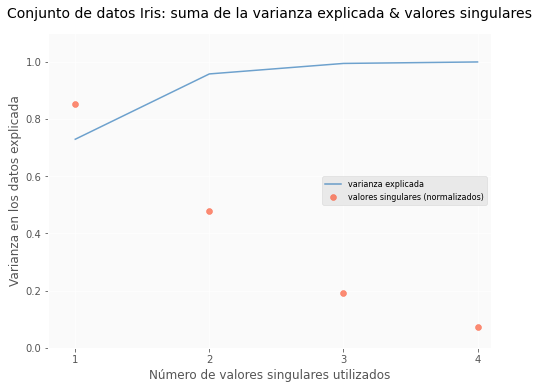

In [74]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

# varianza explicada (línea azul)
# da el % de similitud con los datos originales
plt.plot(num_sv_iris,
         cum_var_explained_iris,
         color='#2171b5',
         label='varianza explicada',
         alpha=0.65,
         zorder=1000)

# valores de sigma normalizados
# da el "aporte" de usar cada singular value en la suma
plt.scatter(num_sv_iris,
            sklearn.preprocessing.normalize(S_iris.reshape((1,-1))),
            color='#fc4e2a',
            label='valores singulares (normalizados)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv_iris)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Número de valores singulares utilizados')
ax.set_ylabel('Varianza en los datos explicada')
ax.set_title('Conjunto de datos Iris: suma de la varianza explicada & valores singulares',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

#### Reducción de dimensión

A juzgar por la curva que representa la suma de la varianza explicada en la figura anterior, se puede ver que:

* con 2 valores singulares, cerca de 96.5% de la varianza de $X$ puede ser explicada
* con 3 valores singulares, ese número llega hasta aproximadamente 99.8%

Ahora se grafica utilizando los primeros 2 valores singulares para representar los datos en los ejes $x$ y $y$, respectivamente.

In [71]:
# selecciona los índices en el df de iris correspondientes a cada tipo de flor, dejándolos en un array
idx_setosa = np.where(iris.target==0)[0]
idx_versicolor = np.where(iris.target==1)[0]
idx_virginica = np.where(iris.target==2)[0]

# selecciona los valores correspondientes de U para cada tipo
# numpy.ndarrays
setosa_x = U_iris[idx_setosa, 0]
setosa_y = U_iris[idx_setosa, 1]

versicolor_x = U_iris[idx_versicolor, 0]
versicolor_y = U_iris[idx_versicolor, 1]

virginica_x = U_iris[idx_virginica, 0]
virginica_y = U_iris[idx_virginica, 1]

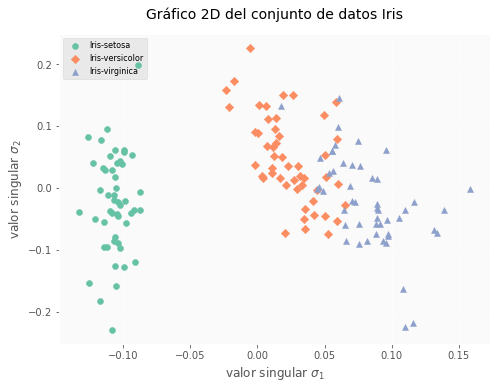

In [72]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(setosa_x,
            setosa_y,
            marker='o',
            color='#66c2a5',
            label='Iris-setosa',
            zorder=1000)

plt.scatter(versicolor_x,
            versicolor_y,
            marker='D',
            color='#fc8d62',
            label='Iris-versicolor',
            zorder=1000)

plt.scatter(virginica_x,
            virginica_y,
            marker='^',
            color='#8da0cb',
            label='Iris-virginica',
            zorder=1000)

plt.legend(loc='upper left', scatterpoints=1, fontsize=8)

ax.set_xlabel(r'valor singular $\sigma_{1}$')
ax.set_ylabel(r'valor singular $\sigma_{2}$')
ax.set_title('Gráfico 2D del conjunto de datos Iris',
             fontsize=14,
             y=1.03)
ax.set_facecolor('0.98')

plt.grid(alpha=0.6, zorder=1)
plt.tight_layout()

**Observación final:**

Se logra visualizar el conjunto de datos original que estaba en 4D en 2D usando las primeras dos columnas de valores singulares de $U$, matriz de vectores singular-izquierda, se logra ver que hay una clara separación para las clases _Iris setosa_ y las otras. De otra manera, la diferenciación entre _Iris versicolor_ e _Iris virginica_ no parece clara.

___

# Parte 2  -  Aplicación de SVD en imágenes
___

# SVD en una imagen 


La ténica del SVD puede ser utiliada para la compresión de imágenes. Por ejemplo, una imagen **[1]** de $m×n$ pixels en escala de grises puede ser representada como una matriz $A \in R^{m×n}$ cuyos elementos $a_{ij}$ representan la intensidad del pixel $(i, j)$. En particular, una imagen contiene mucha información redundante, es decir, que puede ser eliminada sin que el efecto visual sea notable. 

Se podría sustituir la matriz $A$ por otra matriz $B$ de rango menor. 

Consideremos:

Teorema: Sean $\sigma_{1} \geq \sigma_{2} \geq \cdots \geq \sigma_{r} > 0 $ valores singulares no  nulos de $A \in C^{m×n}$. Entonces para cada $k < r$, la distancia desde $A$ al conjunto de matrices de rango $k$ en la norma $\left\Vert \cdot \right\Vert _{2} $ es:

$$\sigma_{k+1} = \min\limits_{rank(B)=k} \left\Vert A - B \right\Vert _{2}$$

Por tanto, si $A = UDV^H $ es la descomposición en valores singulares de $A$, la matriz de rango $k$ de mejor aproximación a $A$ es:

$$B = U 
\begin{bmatrix} S  &  0      \\
                0  &  0
\end{bmatrix} V^T , S = diag(\sigma_1, \sigma_2, \cdots , \sigma_k)$$

Si $U_k$ y $V_k$ son las matrices compuestas por las primeras $k$ columnas de $U$ y $V$,  respectivamente, entonces se puede decir que (fórmula **f_1**):

$$B = U_k D V_{k}^{T}$$

logrando codificar la imagen aproximada por medio de matrices de menor tamaño.


**[1]** Texto base: https://w3.ual.es/~andrei/Practicas/practica14.pdf

___

**Notas importantes:** 
1. Debe comentar ampliamente su código.
1. Para el cálculo del SVD puede utilizar la función svd
1. Para modificar la imagen debe utilizar operaciones algebraicas (Ej. np.dot, np.diag, etc)

___

## 2.1 Aplicación en una imagen en escala de grises  (40 puntos)

1. Cargue la imagen adjunta, "ImagenUsar.jpg". 
1. Muestre su contenido en pantalla.
1. Conviértala a escala de grises.
1. Almacene la imagen en una matriz. 
1. Calcule el SVD.
1. Sea $k$ los $k_{ésimos}$ primeros valores singulares. Para $k \in [5, 25, 50, 100, 200, 500, 1000, 2000, 2193]$, haga:
    1. Proyecte la imagen en los primeros $k$ valores singulares.
    1. Muestre la imagen obtenida en el paso anteior.
1. Finalmente indique sus conclusiones sobre el efecto de la selección de los componentes principales en la nitidez de la imagen generada.  

**IMPORTANTE:** Debe comentar ampliamente su código.

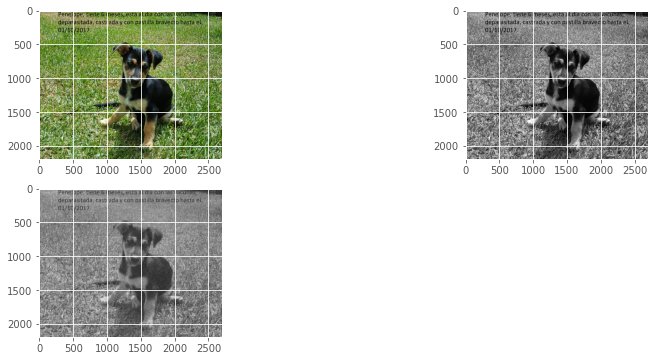

In [85]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageOps

image_name = "imagenUsar.jpg"
k_values = [5, 25, 50, 100, 200, 500, 1000, 2000, 2193]
plt.figure(figsize=(14,6)) # makes images bigger

# 1. image is loaded using PIL
image = Image.open(image_name)

# 2. image shown using plt
plt.subplot(2, 2, 1) #rows, columns, index
plt.imshow(image) #loads image

# 3. image is converted to grayscale
gray_image = ImageOps.grayscale(image)

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray') # loads grayscale image

# 4. stores grayscale image in a matrix
arr = np.asarray(gray_image)

# 5. calculates SVD
arr_zscaled = (arr - arr.mean()) / arr.std(ddof=1) # normalizing data
u_img, s_img, vt_img = np.linalg.svd(arr_zscaled) # calculates the SVD for the grayscale image matrix


# img_index = 3
# for k in k_values:
#     new_img = np.dot(u_img[:,:k], np.dot(np.diag(s_img[:k]), vt_img[:k,:]))
#     plt.subplot(img_index, img_index, img_index)
#     plt.imshow(new_img, cmap='gray') # loads grayscale image
#     img_index += 1

k = 100
new_img = np.dot(u_img[:,:k], np.dot(np.diag(s_img[:k]), vt_img[:k,:]))
plt.subplot(2, 2, 3)
plt.imshow(new_img, cmap='gray') # loads grayscale image

plt.show() # shows plots

## 2.2 Aplicación en una imagen a color  (60 puntos)

Las imágenes a color se representan en Python como matrices numéricas tridimensionales, la tercera dimensión para representar los valores de color (rojo, verde azul). Sin embargo, el método SVD utilizado hasta ahora es aplicable a matrices bidimensionales. Así que tenemos que encontrar una manera de convertir la matriz tridimensional en matrices bidimensionales, aplicar SVD y reconstruirla como una matriz  tridimensional. 

En general hay dos métodos para hacerlo:
1. método de remodelación: Este método implica aplanar la tercera dimensión de la matriz de imágenes en la segunda dimensión utilizando el método de reshape.
1. Método de capa:   Este método trata una imagen en color como una pila de 3 imágenes bidimensionales separadas (capas roja, azul y verde). Se aplica la reconstrucción SVD truncada en cada capa bidimensional por separado y luego se vuelven a juntar las capas reconstruidas.

Desarrolle **dos implementaciones, una para cada método**: (60 puntos, 30 puntos cada implementación)
1. Cargue la imagen adjunta, "ImagenUsar.jpg". 
1. Muestre su contenido en pantalla.
1. Almacene la imagen en una matriz. 
1. Calcule el SVD.
1. Sea $k$ los $k_{ésimos}$ primeros valores singulares. Para $k \in [5, 25, 50, 100, 200, 500, 1000, 2000, 2193]$, haga:
    1. Proyecte la imagen en los primeros $k$ valores singulares.
    1. Muestre la imagen obtenida en el paso anteior.
1. Finalmente indique sus conclusiones sobre el efecto de la selección de los valores singulares en la nitidez de la imagen generada.  



### Solo como ejemplo

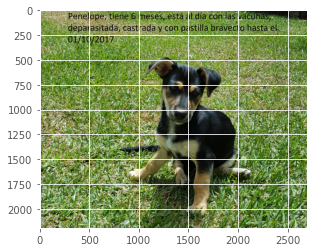

In [56]:
from PIL import Image
import numpy as np

nombreImagen= "imagenUsar"
plt.style.use('ggplot')

image = Image.open(nombreImagen+'.jpg')

plt.imshow(image)
plt.show()

A = np.asarray(image)
original_shape = A.shape